In [30]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ,BasicAer,execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import noise

#import python stuff
import matplotlib.pyplot as plt
import numpy as np
import time
# Set devices, if using a real device
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
quito = provider.get_backend('ibmq_quito')

qiskit.__qiskit_version__

ibmqfactory.load_account:WARNING:2022-05-01 17:47:34,802: Credentials are already in use. The existing account in the session will be replaced.


{'qiskit-terra': '0.20.1', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# For Three Qubits
We create state that
$|\psi\rangle = \frac{1}{\sqrt{2}} (|000\rangle +i|111\rangle)
$


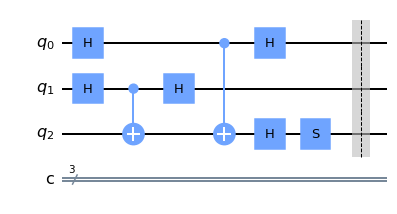

In [31]:

#create state 1/sqrt(2)*(|000>+i|111>)

q1 = QuantumRegister(3,'q')
c1 = ClassicalRegister(3,'c')
ghz = QuantumCircuit(q1, c1)
ghz.h(q1[0])
ghz.h(q1[1])
ghz.cx(q1[1],q1[2])
ghz.h(q1[1])
ghz.cx(q1[0],q1[2])
ghz.h(q1[0])
ghz.h(q1[2])
ghz.s(q1[2])
ghz.barrier()
ghz.draw(output='mpl')

In [32]:
def measure_state(QQQ,q,c,ghz):
    measureQQQ = QuantumCircuit(q,c)
    state = 0
    for i in QQQ:
        if i == 'X':
            measureQQQ.h(q[state])
        elif i == 'Y':
            measureQQQ.sdg(q[state]).inverse()
            measureQQQ.h(q[state])
        state += 1
    measureQQQ.measure(q[0], c[0])
    measureQQQ.measure(q[1], c[1])
    measureQQQ.measure(q[2], c[2])
    ghzQQQ = ghz.compose(measureQQQ)
    return ghzQQQ


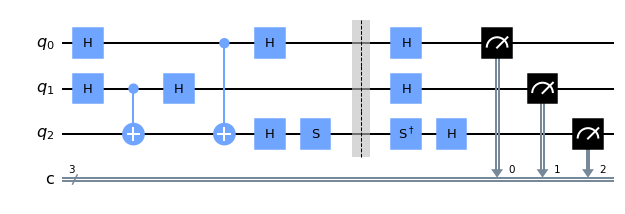

In [36]:
ghzYXX= measure_state('YXX',q1,c1,ghz)
ghzXYX= measure_state('XYX',q1,c1,ghz)
ghzXXY= measure_state('XXY',q1,c1,ghz)
ghzYYY= measure_state('YYY',q1,c1,ghz)
ghzYYY.draw(output='mpl')
ghzXXY.draw(output='mpl')

In [37]:
circuits=[ghzYYY,ghzYXX,ghzXYX,ghzXXY]
shots=1024
transpiled_circuits = transpile(circuits, quito)
job_real = quito.run(transpiled_circuits, shots=shots)
job_monitor(job_real)
result_real = job_real.result()
counts = []
counts.append(result_real.get_counts(ghzYYY))
counts.append(result_real.get_counts(ghzYXX))
counts.append(result_real.get_counts(ghzXYX))
counts.append(result_real.get_counts(ghzXXY))
print(counts)

KeyboardInterrupt: 

In [35]:
Exp=[]
for i in range(4):
    probs={}
    for output in ['000','001','010','011','100','101','110','111']:
        if output in counts[i]:
            probs[output] = counts[i][output]/shots
        else:
            probs[output] = 0
    print(probs)
    Exp.append(probs['000']-probs['001']-probs['010']+probs['011']-probs['100']+probs['101']+probs['110']-probs['111'])
print(Exp)
print(Exp[1]+Exp[2]+Exp[3]-Exp[0])

NameError: name 'counts' is not defined